Juan Pablo Márquez 2022

In [21]:
# ANEM A IMPLEMENTAR EL MODEL SVM (màquines de vector de suport)
# de la llibreria sklearn (machine learning) importam 
# el 'model_selection' que ens permetrà separar les dades d'entrenament de les de test
# el model SVM que volem aplicar
from sklearn import model_selection, svm
# importem el TFidf perquè necessitem treballar amb números 
# volem aplicar un model matemàtic, no podem passar-li termes!!
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
# és un algortime supervisat per la classificació binària.
# per tant hem de definir una col·lecció de documents classificats
# i les categories que volem detectar.

# la col·lecció de documents tendrà aquestes 7 frases.
documents = [ "Los refugiados españoles fueron encontrados en París", 
              "las clases obreras no podrán", 
              "el mundo no vivirá en París y París vivirá en el mundo",
              "El horror vivido no se aguanta",
              "mejor vivir que morir",
              "así da gusto vivir",
              "ya no puedo más"]
# assignarem les categories a cada frase de la col·lecció: positiu o negatiu
classes = ['positivo','negativo','positivo','negativo','positivo', 'positivo' ,'negativo']

In [22]:
# Partició de la colecció etiquetada: test:30% i entrenament:70%
# el mètode que empram és el 'train_test_split'
# 'shuffle=True' vol dir que mescli les frases de la col·lecció
X_train, X_test, y_train, y_test = model_selection.train_test_split(documents, classes, test_size=0.3, shuffle=True)
print(X_train) # imprimim els documents de la col·lecció d'entrenament
print(y_train) # imprimim la categoria que té assignada cada document d'entrenament seleccionat

['mejor vivir que morir', 'el mundo no vivirá en París y París vivirá en el mundo', 'Los refugiados españoles fueron encontrados en París', 'El horror vivido no se aguanta']
['positivo', 'positivo', 'positivo', 'negativo']


In [25]:
# Ara que tenim dividida la col·lecció l'hem d'aplicar al nostre model matemàtic
# TF-IDF assigna un pes a cada paraula segons la seva importància respecte la colecció de documents 
vectorizer = TfidfVectorizer()
# el mètode 'fit' apren (entrena) el vocabulari de la nostra colecció
# calculant el TF-IDF per tots els termes de la col·lecció
tfidf_vocabulari=vectorizer.fit(documents)

# imprimim idf valors
df_idf = pd.DataFrame(vectorizer.idf_, index=vectorizer.get_feature_names(),columns=["Pesos"]) 
# ordenam ascendentment 
df_idf.sort_values(by=['Pesos'])

,Pesos
no,1.470004
vivir,1.980829
el,1.980829
en,1.980829
parís,1.980829
aguanta,2.386294
vivido,2.386294
se,2.386294
refugiados,2.386294
que,2.386294


In [26]:
# representam matemàticament els documents d'entrenament del nostre model.
# Per això hem de convertir a valors numèrics TF-IDF les dades d'entrenament (mètode transform)
X_train_Tfidf = vectorizer.transform(X_train)

In [27]:
# Definir el model SVM amb el mètode SVC. 
# definim el nucli linear perquè ens separi la col·lecció en dos grups emprant una línea
SVM = svm.SVC(kernel='linear') 
# Fase d'entrenament del model amb el mètode 'fit' li pasem les dades d'entrenament
SVM.fit(X_train_Tfidf,y_train) 
# es suposa que aquest algoritme (ja implementat a la llibreria sklearn) aprendrà a 
# classificar en base a les dades d'entrenament que li hem passat

SVC(kernel='linear')

In [38]:
# Ara que el model ja està entrenat el testejarem. Per això agafem les dades de test i les
# transformam a valors nomèrics per poder-les passar al model matemàtic
X_test_Tfidf = vectorizer.transform(X_test) # convertir a valors numèrics TF-IDF les dades de test.
# empram el mètode 'predict' per fer les prediccions i hem de veure si les classifica bé!
resultat = SVM.predict(X_test_Tfidf) 
print("Dades de test:\n",X_test)
print("Classificació assignada:\n",resultat)

Dades de test:
 ['las clases obreras no podrán', 'ya no puedo más', 'así da gusto vivir']
Classificació assignada:
 ['positivo' 'positivo' 'positivo']


In [32]:
# Ara que ja està entrenat i testejat anem a provar amb una nova frase
# abans de passar-li al mètode 'predict' l'hem de transformar numèricament
documents_nous = [ "no se puede con ellos",
                  "La vida es bella"]
predictions_SVM=SVM.predict(vectorizer.transform(documents_nous))
print("Dades noves:\n",documents_nous)
print ("Classificació assignada:\n",predictions_SVM)

Dades noves:
 ['no se puede con ellos', 'La vida es bella']
Classificació assignada:
 ['positivo' 'positivo']


In [33]:
# les matrius de confusió ens permeten avaluar el rendiment dels models supervisats
from sklearn.metrics import confusion_matrix

In [34]:
# Ara imprimirem els valors de rendiment després de l'entrenament per veure si 
# s'han classificat els documents d'entrenament correctament
print ("La classificació de la fase de test era:",y_test)
print ("El predicció de la fase de test ha estat:",resultat)
# el mètode 'ravel' ens permet separar en variables individuals el tn,fp...
tn, fp, fn, tp  = confusion_matrix(y_test, resultat).ravel()
print (tn, fp, fn, tp)
# TP (true positives): nº documents perfectament identificats com a negatius
# FP (false positives): documents considerats negatius però que NO ho eren
# FN (false negatives): documents descartats incorrectament
# TN (true negatives): documents identificats correctament com a positius


La classificació de la fase de test era: ['negativo', 'negativo', 'positivo']
El predicció de la fase de test ha estat: ['positivo' 'positivo' 'positivo']
0 2 0 1


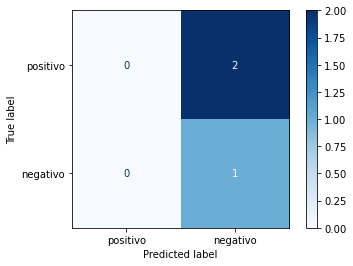

In [35]:
# mostrerem la matriu de confusió per les dades de test
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#SVM ja ha d'estar entrenat
disp = plot_confusion_matrix(SVM, vectorizer.transform(X_test), y_test, display_labels=["positivo", "negativo"],cmap=plt.cm.Blues) 
plt.show()